# Applying Zipf's law to *el país* collection

Let's apply Zipf's law to a collection put together by scraping the news site *el país*. The code used to create the collection and the data used in this notebook can be found at this [notebook's repository](https://github.com/Benardi/bochica).

In [1]:
from math import log10
import re

#import nltk
#nltk.download('punkt')
#nltk.download('stopwords')

import pandas as pd
from plotnine import *
from numpy import arange 
from nltk.util import ngrams    
from nltk.corpus import stopwords
from nltk import FreqDist, word_tokenize, stem
from IPython.display import Markdown, HTML, display

%matplotlib inline
default_stopwords = set(stopwords.words('portuguese'))

## Load Data

In [2]:
data = pd.read_csv("../output/results.csv")
data.head()

,title,subtitle,author,date,section,text,url
0,“A sociedade foi Rubens Paiva não os facínora...,A decisão da juíza que proíbe as Forças Armada...,F. M.,30/03/2019 00:11:08,Brasil,A juíza federal Ivani Silva da Luz de Brasíli...,https://brasil.elpais.com/brasil/2019/03/26/po...
1,Justiça suspende decisão que proibia Forças Ar...,Liminar havia sido concedida na sexta-feira a ...,Marina Rossi,30/03/2019 16:17:59,Brasil,Menos de 24 horas depois de a juíza federal Iv...,https://brasil.elpais.com/brasil/2019/03/30/po...
2,Governo Bolsonaro prega “negacionismo históric...,Marcos Napolitano professor da USP diz que o...,Regiane Oliveira,04/04/2019 22:37:48,Brasil,Quando determinou que de 31 de março 1964 u...,https://brasil.elpais.com/brasil/2019/04/05/po...
3,Quando os pais de Gabo perceberam que tinham u...,Gustavo Tatis percorre o universo de García Má...,Jesús Ruiz Mantilla,07/03/2019 16:38:56,Cultura,Quando era pequeno Luisa e Gabriel se preo...,https://brasil.elpais.com/brasil/2019/03/06/cu...
4,Rádios canadenses banem músicas de Michael Jac...,Quebec Cogeco Media toma a decisão após queixa...,Jaime Porras Ferreyra,07/03/2019 16:12:37,Cultura,Desde a manhã da última segunda-feira e ...,https://brasil.elpais.com/brasil/2019/03/06/cu...


## *El país* collection (characteristics)

In [3]:
# Aggregate the text of  all documents together
corpus = data["text"].apply(lambda x: word_tokenize(x)).sum()

words = [word for word in corpus]
bigrams = list(ngrams(corpus, 2))

# Remove words that don't have at least one alphabetical character 
words = [word for word in words if any(c.isalpha() for c in word)]
bigrams = [(word1,word2) for word1, word2 in bigrams 
           if any(c.isalpha() for c in word1) and 
           any(c.isalpha() for c in word2)]

# Lowercase all words (default_stopwords are lowercase too)
words = [word.lower() for word in words]
bigrams = [(word1.lower(),word2.lower()) for word1, word2 in bigrams]

In [4]:
# calculate frequency distribution of words and bigrams
fdist = FreqDist(words)
bifdist = FreqDist(bigrams)

# number of words with more than 1000 occurrences
nw_1000 = len(list(filter(lambda x: x > 1000,fdist.values())))

# number of words with exactly 1 occurrence
nw_1 = len(list(filter(lambda x: x== 1, fdist.values())))

# number of bigrams with more than 100 occurrences
nb_100 = len(list(filter(lambda x: x > 100,bifdist.values())))

# number of bigrams with exactly 1 occurrence
nb_1 = len(list(filter(lambda x: x== 1, bifdist.values())))

In [5]:
display(Markdown("***"))
display(Markdown("### Statistics for *el país* collection"))
print("Total documents:               {}".format(data.shape[0]))
print("Total word occurrences:        {}".format(len(words)))
print("Vocabulary size:               {}".format(len(set(words))))
print("Words occurring > 1000 times:  {}".format(nw_1000))
print("Words occurring once:          {}".format(nw_1))
print("Bigrams occurring > 100 times: {}".format(nb_100))
print("Bigrams occurring once:        {}".format(nb_1))
display(Markdown("***"))

***

### Statistics for *el país* collection

Total documents:               249
Total word occurrences:        210224
Vocabulary size:               24705
Words occurring > 1000 times:  23
Words occurring once:          13252
Bigrams occurring > 100 times: 44
Bigrams occurring once:        89147


***

In [6]:
df = pd.DataFrame.from_dict(fdist, orient='index', columns=["Freq."])
df = df.sort_values(by=['Freq.'], ascending=False)
df = df.rename_axis('Word').reset_index()
df = df.rename_axis('r').reset_index()
df["r"] = df["r"].apply(lambda x: x + 1)
df["Pr"] = df["Freq."] / df["Freq."].sum() 
df["Pr(%)"] = df["Pr"].apply(lambda x: x * 100)
df["ln(Pr)"] = df["Pr"].apply(lambda x: log10(x))
df["r * Pr"] = df["r"] * df["Pr"]
df = df[['Word', 'Freq.', 'r', 'Pr','ln(Pr)', 'Pr(%)', 'r * Pr']]

display(Markdown("***"))
display(Markdown("### Most frequent *50* Words from *el país* collection"))
display(HTML(df.head(50).to_html(index=False)))
display(Markdown("***"))

***

### Most frequent *50* Words from *el país* collection

Word,Freq.,r,Pr,ln(Pr),Pr(%),r * Pr
de,10194,1,0.048491,-1.314338,4.849113,0.048491
a,7250,2,0.034487,-1.462344,3.448702,0.068974
que,6549,3,0.031152,-1.506507,3.115248,0.093457
o,6365,4,0.030277,-1.518884,3.027723,0.121109
e,5708,5,0.027152,-1.566198,2.715199,0.135760
do,3463,6,0.016473,-1.783230,1.647291,0.098837
em,3312,7,0.015755,-1.802592,1.575462,0.110282
da,3010,8,0.014318,-1.844116,1.431806,0.114544
um,2676,9,0.012729,-1.895196,1.272928,0.114564
para,2301,10,0.010945,-1.960766,1.094547,0.109455


***

In [7]:
dfbi = pd.DataFrame.from_dict(bifdist, orient='index', columns=["Freq."])
dfbi = dfbi.sort_values(by=['Freq.'], ascending=False)
dfbi = dfbi.rename_axis('Bigram').reset_index()
dfbi = dfbi.rename_axis('r').reset_index()
dfbi["r"] = dfbi["r"].apply(lambda x: x + 1)
dfbi["Pr"] = dfbi["Freq."] / dfbi["Freq."].sum() 
dfbi["Pr(%)"] = dfbi["Pr"].apply(lambda x: x * 100)
dfbi["ln(Pr)"] = dfbi["Pr"].apply(lambda x: log10(x))
dfbi["r * Pr"] = dfbi["r"] * dfbi["Pr"]
dfbi = dfbi[['Bigram', 'Freq.', 'r', 'Pr','ln(Pr)', 'Pr(%)', 'r * Pr']]

display(Markdown("***"))
display(Markdown("### Most frequent *50* bigrams from *el país* collection"))
display(HTML(dfbi.head(50).to_html(index=False)))
display(Markdown("***"))

***

### Most frequent *50* bigrams from *el país* collection

Bigram,Freq.,r,Pr,ln(Pr),Pr(%),r * Pr
"(que, o)",493,1,0.002537,-2.595671,0.253705,0.002537
"(o, que)",384,2,0.001976,-2.704186,0.197612,0.003952
"(que, a)",364,3,0.001873,-2.727416,0.187320,0.005620
"(de, um)",357,4,0.001837,-2.735849,0.183718,0.007349
"(com, o)",322,5,0.001657,-2.780662,0.165706,0.008285
"(com, a)",314,6,0.001616,-2.791588,0.161589,0.009695
"(e, a)",313,7,0.001611,-2.792973,0.161075,0.011275
"(e, o)",277,8,0.001425,-2.846038,0.142548,0.011404
"(que, não)",267,9,0.001374,-2.862006,0.137402,0.012366
"(de, uma)",258,10,0.001328,-2.876898,0.132771,0.013277


***

## Rank vs Frequency

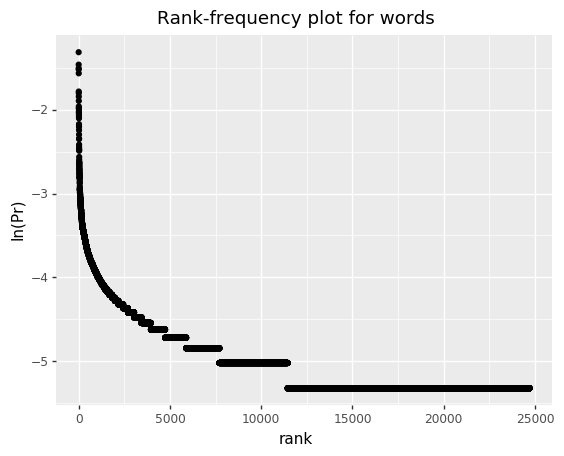

<ggplot: (8752977651832)>

In [8]:
(ggplot(df) 
 + geom_point(aes('r','ln(Pr)')) 
 + labs(title="Rank-frequency plot for words", x="rank")
)

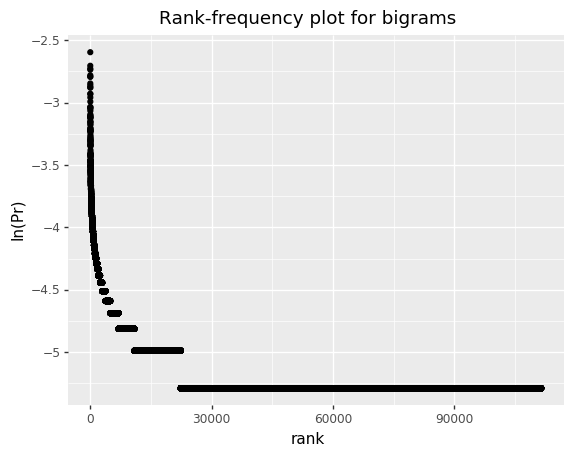

<ggplot: (-9223363283877123875)>

In [9]:
(ggplot(dfbi) 
 + geom_point(aes('r','ln(Pr)'))
 + labs(title="Rank-frequency plot for bigrams", x="rank")
)

In [10]:
from math import inf, sqrt
from functools import reduce

def search_best_c(df, search_range):

    """Searchs for best c parameter for a collection.

    Fits a range of 'c' to predict ranking using probability
    and assesses each fit by using the metric RMSE, this func
    returns the best 'c' and the lowest 'RMSE'.

    :param obj df: Pandas dataframe with the collection data.

    :return: c parameter that yielded the lowest rmse 

    :rtype: float
    
    :return: lowest rmse encountered 

    :rtype: float
    """
    rmse = 0
    best_c = None
    N = df.shape[0]
    best_rmse = inf
    
    for c in search_range:
        rmse = df["r"] - (c / df["Pr"] )
        rmse = list(map(lambda x: pow(x,2), rmse))
        rmse = reduce(lambda x,y: x+y, rmse)
        rmse = sqrt(rmse / N)
        if rmse < best_rmse:
            best_rmse = rmse
            best_c = c

    return best_c, best_rmse

In [11]:
word_c, word_rmse = search_best_c(df, arange(1e-20, 1, 2.5e-3))

display(Markdown("***"))
display(Markdown("### Best parameter 'c'  for *el país* collection in terms of words"))
print("\n    c: {}".format(word_c))
print(" rmse: {}".format(word_rmse))
display(Markdown("***"))

***

### Best parameter 'c'  for *el país* collection in terms of words


    c: 0.08750000000000001
 rmse: 2869.011884239648


***

In [12]:
bi_c, bi_rmse = search_best_c(dfbi, arange(1e-20, 1, 2.5e-3))
display(Markdown("***"))
display(Markdown("### Best parameter 'c'  for *el país* collection in terms of bigrams"))
print("\n    c: {}".format(bi_c))
print(" rmse: {}".format(bi_rmse))
display(Markdown("***"))

***

### Best parameter 'c'  for *el país* collection in terms of bigrams


    c: 0.3375
 rmse: 23843.986397347566


***

## Predict Proportion

In [13]:
actual_nwords = df['Freq.'].value_counts()
actual_prop = df.groupby(['Freq.'])['Pr'].agg('sum')

df_prop = pd.DataFrame({'n':actual_prop.index, 'actual_#words':actual_nwords.values,
                        'actual_prop': actual_prop.values})

df_prop["pred_prop"] = df_prop["n"].apply(lambda n: (1 / (n *(n + 1))))

df_prop = df_prop[['n','pred_prop', 'actual_prop', 'actual_#words']]
df_prop.columns = ["Number of occurrences (n)", 'Predicted Proportion (1/n(n+1))',
                   'Actual Proportion', 'Actual Number of Words']

display(Markdown("***"))
display(Markdown("### Proportions of words occurring n times"))
display(HTML(df_prop.head(10).to_html(index=False)))
display(Markdown("***"))

***

### Proportions of words occurring n times

Number of occurrences (n),Predicted Proportion (1/n(n+1)),Actual Proportion,Actual Number of Words
1,0.500000,0.063038,13252
2,0.166667,0.035610,3743
3,0.083333,0.025972,1820
4,0.050000,0.021958,1154
5,0.033333,0.018480,777
6,0.023810,0.014727,516
7,0.017857,0.013486,405
8,0.013889,0.012786,336
9,0.011111,0.011259,263
10,0.009091,0.012510,263


***

In [14]:
actual_nbi = dfbi['Freq.'].value_counts()
actual_propbi = dfbi.groupby(['Freq.'])['Pr'].agg('sum')

df_propbi = pd.DataFrame({'n':actual_propbi.index, 'actual_#bigrams':actual_nbi.values,
                        'actual_propbi': actual_propbi.values})

df_propbi["pred_prop"] = df_propbi["n"].apply(lambda n: (1 / (n *(n + 1))))

df_propbi = df_propbi[['n','pred_prop', 'actual_propbi', 'actual_#bigrams']]
df_propbi.columns = ["Number of occurrences (n)", 'Predicted Proportion (1/n(n+1))',
                   'Actual Proportion', 'Actual Number of Bigrams']

display(Markdown("***"))
display(Markdown("### Proportions of bigrams occurring n times"))
display(HTML(df_propbi.head(10).to_html(index=False)))
display(Markdown("***"))

***

### Proportions of bigrams occurring n times

Number of occurrences (n),Predicted Proportion (1/n(n+1)),Actual Proportion,Actual Number of Bigrams
1,0.500000,0.458764,89147
2,0.166667,0.117950,11460
3,0.083333,0.060565,3923
4,0.050000,0.042651,2072
5,0.033333,0.030491,1185
6,0.023810,0.024763,802
7,0.017857,0.018804,522
8,0.013889,0.016921,411
9,0.011111,0.013431,290
10,0.009091,0.012557,244


***